# Kratek uvod v nevronske mreže


## Model nevrona

<img src="img/2025-12-02-10-55-37.png" width="800">

## Aktivacijske funkcije

<img src="img/2025-12-04-06-54-15.png" width="800">

## Osnovna topologija mreže


<img src="img/2025-12-04-07-51-24.png" width="800">

# Implementacija XOR operatorja

Prenosna tabela

| Vhod A | Vhod B | Izhod Y |
|--------|--------|---------|
| 0      | 0      | 0       |
| 0      | 1      | 1       |
| 1      | 0      | 1       |
| 1      | 1      | 0       |

Topologija mreže

![Nevronska mreža](img/nn1.jpg)

Uvoz Knjižnic

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

Zapis vhodov in izhodov v obliki vektorjev (tenzorjev)

In [37]:
# Vhodni podatki (features): 4 možne kombinacije z 2 vhodoma
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Izhodni podatki (labels): Pravilni rezultat XOR
Y = torch.tensor([[0.], [1.], [1.], [0.]])

Model nevronske mreže

In [38]:
# Definicija modela z nn.Sequential
model = nn.Sequential(
    nn.Linear(2, 7),  # Vhod (2) -> Skrita plast (7 nevronov)
    nn.ReLU(),
    nn.Linear(7, 1),  # Skrita plast (7) -> Izhod (1 nevron)
    nn.Sigmoid()
)

In [39]:
# Loss: Binarna Cross-Entropy Loss
criterion = nn.BCELoss() 

# Optimizer: Adam (z učno hitrostjo 0.1)
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Seznam za shranjevanje izgube
loss_history = []

In [40]:
N_EPOCHS = 80 # Število ponovitev učenja


for epoch in range(N_EPOCHS):
    # 1. Forward Pass: Pridobitev napovedi
    y_pred = model(X)
    
    # 2. Izračun Izgube
    loss = criterion(y_pred, Y)
    loss_history.append(loss.item())
    
    # 3. Zero Gradients in Backward Pass (Prilagajanje uteži)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [41]:
model.eval() 
predictions = model(X)

print("\n--- Končni Rezultati ---")
for i in range(len(X)):
    print(f"Vhod: {X[i].tolist()} -> Napoved: {predictions[i].item():.4f}")


--- Končni Rezultati ---
Vhod: [0.0, 0.0] -> Napoved: 0.0085
Vhod: [0.0, 1.0] -> Napoved: 0.9974
Vhod: [1.0, 0.0] -> Napoved: 0.9988
Vhod: [1.0, 1.0] -> Napoved: 0.0085


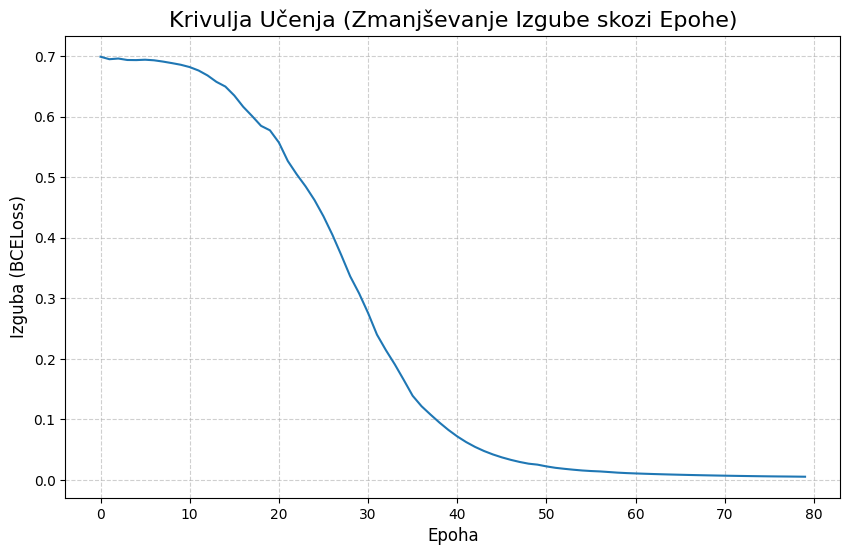

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Krivulja Učenja (Zmanjševanje Izgube skozi Epohe)', fontsize=16)
plt.xlabel('Epoha', fontsize=12)
plt.ylabel('Izguba (BCELoss)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()